# Units and Quantities

## Objectives

- Use units
- Create functions that accept quantities as arguments
- Create new units

## Basics

How do we define a Quantity and which parts does it have?

In [1]:
from astropy import units as u 


In [3]:
# Define a quantity length
length = 24.3 * u.meter
# print it
print(length)


24.3 m


In [4]:
# Type of quantity
type(length)

astropy.units.quantity.Quantity

In [5]:
# Type of unit
type(u.meter)

astropy.units.core.IrreducibleUnit

In [6]:
# Quantity
length # Not using the print command produces a Latex output.

<Quantity 24.3 m>

In [7]:
# value
length.value

24.3

In [8]:
# unit
length.unit

Unit("m")

In [9]:
length.info #n_bad used to define bad data

dtype = float64
unit = m
class = Quantity
n_bad = 0

In [8]:
# information


Quantities can be converted to other units systems or factors by using `to()`

In [12]:
# Convert it to: km, lyr
length.to(u.lyr) # u.[tab] shows a menu with possible completions

<Quantity 2.5685120266798154e-15 lyr>

We can do arithmetic operations when the quantities have the compatible units:

In [13]:
# arithmetic with distances
distance_start = 10 * u.mm
distance_end = 23 * u.km
length = distance_end - distance_start
print(length)

22.99999 km


Quantities can also be combined, for example to measure speed

In [15]:
# calculate a speed
time = 15* u.minute
speed = length /time
print(speed)

speed 

1.53333266667 km / min


<Quantity 1.5333326666666667 km / min>

In [17]:
# decompose it
print(speed.decompose()) # changes to m/s
print(speed.cgs) # cgs = centimetres, grams and seconds

25.5555444444 m / s
2555.55444444 cm / s


<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> Convert the speed in imperial units (miles/hour) using: <br>

 ```from astropy.units import imperial```
 </li>
 <li> Calculate whether a pint is more than half litre<br>
 
 <emph>You can compare quantities as comparing variables.</emph> <br>
 Something strange? Check what deffinition of <a href='https://en.wikipedia.org/wiki/Pint'>pint</a> astropy is using.
 </li>
 <li> Does units work with areas? calculate the area of a rectangle of 3 km of side and 5 meter of width. Show them in m^2 and convert them to yards^2</li>
</div>

In [31]:
#1 
from astropy.units import imperial

speed.to(imperial.mile /u.hour)

<Quantity 57.16612483098704 mi / h>

In [36]:
#2
imperial.pint > 0.5 * u.liter

False

In [43]:
#3
length = 3 * u.km
width = 5 * u.meter

area = length * width

print(area.to(u.m **2))

area.decompose()

area.to(imperial.yard **2)

15000.0 m2


<Quantity 17939.8506945162 yd2>

## Composed units

Many units are compositions of others, for example, one could create new combinationes for ease of use:

In [46]:
# create a composite unit
cms = u.cm / u.s #Creates the new unit

speed.to (cms)


<Quantity 2555.5544444444445 cm / s>

In [48]:
# and in the imperial system
mph = imperial.mile / u.hour

speed.to(mph)

<Quantity 57.16612483098704 mi / h>

and others are already a composition:

In [49]:
# what can be converted from s-1?
(u.s ** -1).compose()

[Unit("Hz"), Unit("Bq"), Unit("3.7e+10 Ci")]

In [50]:
# or Jules?
(u.joule).compose()


[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

In [51]:
# Unity of R
(13.605692 * u.eV).to(u.Ry)

<Quantity 0.9999999618935274 Ry>

Sometime we get *no units* quantitites

In [52]:
# no units
nounits = 20 * u.cm / (1* u.m)
nounits

<Quantity 20.0 cm / m>

What happen if we add a number to this?

In [53]:
# arithmetic with no units
nounits +3


<Quantity 3.2>

In [54]:
# final value of a no unit quantity
nounits.decompose()

<Quantity 0.2>

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers, for example converting between wavelength and frequency.

In [58]:
# converting spectral quantities
(656.281 * u.nm).to(u.Hz, equivalencies = u.spectral())

<Quantity 456805024067434.5 Hz>

In [25]:
# but doing it right


Other built-in equivalencies are: 
 - `parallax()`
 - Doppler (`dopplr_radio`, `doppler_optical`, `doppler_relativistic`)
 - spectral flux density
 - brigthness temperature
 - temperature energy
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

In [61]:
# finding the equivalencies
u.Hz.find_equivalent_units()

  Primary name | Unit definition | Aliases     
[
  Bq           | 1 / s           | becquerel    ,
  Ci           | 2.7027e-11 / s  | curie        ,
  Hz           | 1 / s           | Hertz, hertz ,
]

In [62]:
# but also using other systems
u.Hz.find_equivalent_units(equivalencies = u.spectral())

  Primary name | Unit definition        | Aliases              
[
  AU           | 1.49598e+11 m          | au, astronomical_unit ,
  Angstrom     | 1e-10 m                | AA, angstrom          ,
  Bq           | 1 / s                  | becquerel             ,
  Ci           | 2.7027e-11 / s         | curie                 ,
  Hz           | 1 / s                  | Hertz, hertz          ,
  J            | kg m2 / s2             | Joule, joule          ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg               ,
  cm           | 0.01 m                 | centimeter            ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt          ,
  erg          | 1e-07 kg m2 / s2       |                       ,
  k            | 100 / m                | Kayser, kayser        ,
  lyr          | 9.46073e+15 m          | lightyear             ,
  m            | irreducible            | meter                 ,
  micron       | 1e-06 m                |                       ,
  pc      

## Printing the quantities

In [65]:
# Printing values with different formats
print("{0.value:0.03f} is in {0.unit:latex_inline}".format(speed))

1.533 is in $\mathrm{km\,min^{-1}}$


## Arrays

Quantities can also be applied to arrays

In [66]:
# different ways of defining a quantity for a single value
length = 44 * u.m
time = u.Quantity(23, u.s)
speed = length /time
speed

<Quantity 1.9130434782608696 m / s>

In [70]:
# now with lists
length_list = [1, 2, 3]* u.m
# and arrays
import numpy as np
time_array = np.array([1,2,3]) * u.s
# and its arithmetics
length_list / time_array

<Quantity [ 1., 1., 1.] m / s>

In [74]:
# angles are smart!
angles = u.Quantity(np.arange(180), u.degree)
print(angles[[0, 90, -1]])
print(np.sin(angles[[0,90,  -1]]))

[   0.   90.  179.] deg
[ 0.          1.          0.01745241]


## Plotting quantities

To work nicely with matplotlib we need to do as follows:

In [75]:
# allowing for plotting
from astropy.visualization import quantity_support
quantity_support()

# loading matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


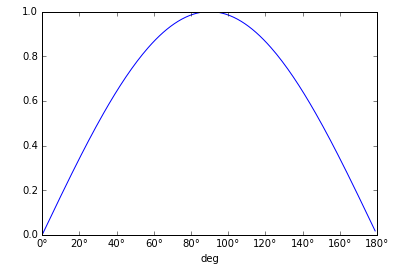

In [76]:
# Ploting the previous array

plt.plot(angles, np.sin(angles))

## Creating functions with quantities as units

We want to have functions that contain the information of the untis, and with them we can be sure that we will be always have the *right* result.

In [83]:
# Create a function for the Kinetic energy
@u.quantity_input(mass=u.kg, speed=u.m/u.s) #Tells the function what type of units to expect
def kinetic(mass, speed):
    return(mass * speed **2 /2).to(u.joule)

In [84]:
kinetic(3 * u.kg, 5 * mph)

<Quantity 7.49417856 J>

In [85]:
# run with and without units
kinetic(3,5)

TypeError: Argument 'mass' to function 'kinetic' has no 'unit' attribute. You may want to pass in an astropy Quantity instead.

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol start=4>
  <li> Create a function that calculates potential energy where *g* defaults to Earth value, 
  but could be used for different planets. 
  Test it for any of the *g* values for any other 
  <a href="http://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g">planet</a>.
  </li>
 </ol>
</div>

In [97]:
#4
@u.quantity_input(mass = u.kg, height=u.m, g =u.m / (u.s **2)) #Tells the function what type of units to expect
def potential_energy(mass, height, g=9.8 * u.m/ (u.s **2)):
    return(mass * height * g).to(u.joule)


In [98]:
# run it for some values
potential_energy(23*u.g  ,4.5 * u.km)

<Quantity 1014.3000000000001 J>

In [100]:
# on Mars:
potential_energy(5*u.kg, 1 *u.m, g= 3.75 * u.m/(u.s **2))

<Quantity 18.75 J>

## Create your own units

Some times we want to create our own units:

In [103]:
# Create units for a laugh scale
titter = u.def_unit('titter')
chuckle = u.def_unit('chuckle', 5* titter)
laugh = u.def_unit('laugh', 4 *chuckle)
guffaw = u.def_unit('guffaw', 3 * laugh)
rofl = u.def_unit('rofl', 4*guffaw)
death_by_laughing = u.def_unit('death_by_laughing', 10 * rofl)

print((1 * rofl).to(titter))

240.0 titter


<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol start=5>
  <li> Convert the area calculated before `rectangle_area` in <a href="https://en.wikipedia.org/wiki/Hectare">Hectare</a>
  (1 hectare = 100 ares; 1 are = 100 m2).
  </li>
 </ol>
</div>

In [106]:
#5
are = u.def_unit('are', 100 * u.m**2)
hectare = u.def_unit('hectare', 100 * are)

print(area.to(hectare))
print(area.to(u.m **2))

1.5 hectare
